<a href="https://colab.research.google.com/github/erictong0/FrederickLab2023/blob/main/Euler's_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.664000000000155e-07
4.097000000000107e-06
1.1585999999999032e-05
0.0001295340000001004


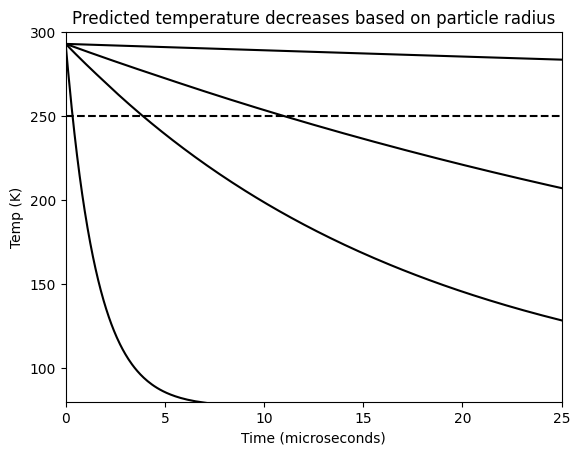

In [ ]:
###Importing packages
import math #the math package is used for general calculations
import matplotlib.pyplot as plt #pyplot is used to visualize the graph
import numpy as np #numpy is used for trigonometric functions

###This function calculates the time it takes for a particle to reach a certain temperature after being sprayed into LN2 and adds the data into a graph

#radius is the radius of the particle in micrometers
#stepSize is the size of each calculation step in nanoseconds. Larger stepSizes result in faster calculations but also have decreased accuracy.
#temperature represents the ending temperature of the sample in Kelvin. Given LN2 cools to 77K, temperatures less than or equal to 77K will never be possible
def makePlot(radius, stepSize, temperature):

  ###Transfering the inputs into local variables
  stepSizeInput = stepSize #Step size in nanoseconds
  radiusInput = radius #Radius in microns
  endingTemperatureInput = temperature #Ending temperature of the sample in K

  ###Initalizing values already known
  startingTemperatureInput = 293 #Starting temperature of the sample in K
  percentGlycerolInput = .15 #Percent glycerol of the particle by volume
  glycerolDensity = 1261 #Starting density of glycerol in kg/m^3 @293K
  waterDensity = 998.23 #Starting density of water in kg/m^3 @293K
  specificHeatInput = 2 #Estimated specific heat in cal/g/C of 15% glycerol/85% water (by volume) mixtures
  u = 10 #Estimated plunge velocity of the particle in m/s
  k = .1415 #Estimated thermal conductivity of the LN2 in W/m/K @77K
  v = .1887E-6 #Estimated kinematic viscosity of the LN2 in m^2/s @77K

  ###Converting variables to standard units
  r = radiusInput * 10**-6 #radius in meters
  step = stepSizeInput * 10**-9 #step size in seconds
  temp = startingTemperatureInput #temp represents the current temperature of the sample in K. It starts at room temperature (293K) but changes over time
  eTemp = endingTemperatureInput #eTemp represents the final temperature in K
  startingVolume = 4/3 * np.pi * r**3 #volume of the particle in m^3, assumes the particle is spherical
  glycerolVolume = startingVolume * percentGlycerolInput #volume of the particle that is glycerol in m^3
  waterVolume = startingVolume - glycerolVolume #volume of the particle that is water in m^3, found by subtracting total volume from glycerol volume
  glycerolMass = glycerolVolume * glycerolDensity #the mass of glycerol in the particle in kg, found by multiplying volume/density
  waterMass = waterVolume * waterDensity #the mass of water in the particle in kg, found by multiplying volume/density
  totalMass = glycerolMass + waterMass #the total mass of the particle in kg, found by adding the mass of the two components
  specificHeat = specificHeatInput * 4186.8 #converting specific heat from cal/g/C to J/kg/K

  ###Calculating coefficients
  h = .6 * k * np.sqrt(u/2/v) #Calculating the local heat-transfer coefficient using the formula by Krimski (2003)
  c = h * 4 * np.pi / specificHeat #Creating a constant that accounts for all constant factors

  ###Formula for calculating density of water/glycerol mixtures at varying temperatures, based on http://www.met.reading.ac.uk/~sws04cdw/viscosity_calc.html
  #calcDensity returns the density of the particle at the current temperature in kg/m^3
  #temp represents the current temperature of the particle in K
  def calcDensity(temp):
    T = temp - 273 #T is the current temperature of the particle in C
    glycerolDen = (1273.3-0.6121*T) #Density of Glycerol (kg/m3)

    #The water density was unrealistic at temperatures below freezing, so the density of amorphous ice was used below freezing temperatures
    if T > 0:
      waterDen = 1000 #Density of water (kg/m^3)
    else:
      waterDen = 940 #Density of amorphous ice (kg/m^3)

    #Calculating the total mass and volumes of glycerol and water
    waterVol = waterMass / waterDen
    glycerolVol = glycerolMass / glycerolDen
    totalMass=glycerolMass+waterMass
    mass_fraction=glycerolMass/totalMass
    vol_fraction= glycerolVol/(glycerolVol+waterVol)

    #Putting numbers into a formula
    contraction_av = 1-math.pow(3.520E-8*((mass_fraction*100)),3)+math.pow(1.027E-6*((mass_fraction*100)),2)+2.5E-4*(mass_fraction*100)-1.691E-4
    contraction = 1+contraction_av/100
    density_mix=(glycerolDen*vol_fraction+waterDen*(1-vol_fraction))*contraction
    return density_mix
    ###End of the density function

  ###Initalizing variables used in functions
  time = 0 #time taken in seconds, starts at 0
  x = [0] #Array to track time in ns
  y = [293] #Array to track temperature in K
  tempTemp = temp-1 #tempTemp allows the program to record the time and temperature every 1K drop
  if radius > 45:
    tempTemp = temp - .05
  printedTime = 0
  #This loop continues until the current temperature is less than the final temperature
  while temp > (endingTemperatureInput):
    ###Calculating variables
    density = calcDensity(temp) #Calculates the current density based on temperature using the earlier function
    r3_2 = math.sqrt((4 * np.pi * totalMass)/(3 * density)) #The radius cubed is found based on the volume divided by the density,
    changeInTemp = c * r3_2 * (temp-77) / totalMass #Calculates the change in temperature per second

    #The change in temperature is subtractd because the change represents the temperature from the inside of the particle to the environment
    temp -= changeInTemp * step #Multiplies the change in temperature [K/s] by the step size [K] to get the resulting change in temperature [K]
    time += step #The current time is incremented by the step

    #This code executes each time the temperature drops 1K.
    #It records the current time, current temperature, and sets the next temperature to record the time
    if temp < tempTemp:
      #print(str(round(time * 10E9)) + ": " + str(temp) + "K") #Old print statement to debug the code
      x.append(time * 1E6) #Appends the current time in microseconds to an array
      y.append(temp) #Appends the current temperature in K to a different array

      tempTemp = temp - 1 #Sets the next temperature to record the time to be one Kelvin below the current temperature

      if radius > 45:
        tempTemp = temp - .1

    if printedTime == 0:
      if temp < 248:
        printedTime = time
        print(printedTime)
      ###End of the if statement
    ###End of the while loop

  ###After the calculations finish, a graph is created
  plt.xlabel("Time (microseconds)") #Adds the x-axis label
  plt.ylabel("Temp (K)") #Adds the y-axis label
  plt.plot(x, y, color = "black") #Plots the

  ###Deprecated code
  #plt.title("Predicted temperature of " + str(radiusInput*2) + "um (diameter) particle over time") #Would add a graph title for single-particle graphs
  #print(str(round(time * 1E9)) + " nanoseconds") #Prints the overall time taken for the particle to reach the desired temperature

  ###End of the function


###Calling the function with different parameters
plt.title("Predicted temperature decreases based on particle radius") #Adds a title to the plot
makePlot(1, .1, 77.1) #Makes a sample plot based on a particle with a 1 micrometer radius, 1ns step size, and an ending temperature of 77.1K
makePlot(5, 1, 78) #Optional code for adding more lines to the same graph
makePlot(10, 2, 80)
makePlot(50, 1, 150)
plt.axhline(y=250, color='black', linestyle='--')
#plt.xlim(0, 25)
plt.xlim(0, 25)
plt.xticks(np.arange(0, 26, step = 5))
plt.ylim(80, 300)
plt.yticks(np.arange(100, 301, step = 50))
plt.savefig("230718_sTime_lTemp.svg", format = "svg")
plt.show() #Visualizes the plot as output
